# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


# Шаг 1. Загрузка данных и подготовка их к анализу

In [345]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc = {'figure.figsize' :(16, 6)}, style = 'whitegrid')
url = '~/progect_game/datasets/games.csv'
games = pd.read_csv(url)
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Таблица прочитана корректно. Есть нулевые и пропущенные значения.
Приведем названия столбцов к нижнему регистру, чтобы сократить количество ошибок при наборе названий столбцов.

In [346]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Шаг 2. Предобработка данных

Оценим объём данных в таблице games и посмотрим информацию по типам данных.

*Описание данных games.csv*

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Данные за 2016 год могут быть неполным.

In [347]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица содержит 16715 строк.  
- Столбец Year_of_Release (год выпуска) - дискретная переменная, приведем ее к типу int.

- Столбец User_Score (оценка пользователей) - приведем к вещественному типу.
- Удалим строки с пустым значением Name, так как их всего две. Они не изменят общую статистическую картину.
- Пустые строки Critic_Score и User_Score, удалять не будем. Так как много пропущенных, они изменят общую статистическую картину и мы сделаем не правильные выводы. Оценки могут быть пустыми, например, если игра была выпущена в конце года.

In [348]:
# приведение дискретных переменных к целочисленному типу
games['year_of_release'] = games['year_of_release'].astype('Int64')

Обратим внимание, что столбец **user_score** имеет строковый тип, а не вещественный. Отсортируем таблицу по столбцу "user_score"  
и выясним почему он имеет не правильный тип.

In [349]:
games.sort_values(by='user_score', ascending=False).reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
1,10948,The Revenge of Shinobi,GBA,2002,Platform,0.07,0.02,0.00,0.00,51.0,tbd,E
2,3955,Disney Sing It,PS2,2008,Misc,0.25,0.19,0.00,0.06,NaN,tbd,E
3,10850,NFL Blitz 20-02,XB,2002,Sports,0.07,0.02,0.00,0.00,77.0,tbd,E
4,10847,Just Dance 2017,WiiU,2016,Misc,0.03,0.06,0.00,0.01,NaN,tbd,E10+
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


После сортировки таблицы, видно что некоторые значения столбца **user_score** имеют строковые значения **tbd**.  
'To Be Determined' - будет определено позже, можно заменить на значение не определено. Чтобы привести столбец к вещественному типу и иметь возможность применить к нему математические операции.
- заменим **tbd** на **NaN** 
- приведем столбец **user_score** к вещественному типу.

In [350]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
games['user_score'] = games['user_score'].astype('float64')

Удалим пустые значения в столбцах **name**, **genre**

In [351]:
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Приведем в порядок данные в столбце **year_of_release**.

In [352]:
# количество пропущенных значений в столбце 'year_of_release'
games['year_of_release'].isnull().sum()  

269

In [353]:
# так как название игр может совпадать, то в цикле сделаем замену, вместо NaN, поставим год выпуска
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()


 Выведем количество пустых значении в стобце **year_of_release** , после применения цикла.

In [354]:

games['year_of_release'].isnull().sum()

146

Удалим строки с пропущенными значениями из *year_of_release*

In [355]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

Так как оценка пользователей и критиков может иметь значение больше или равно нулю. Заменим пропущенные значения в столбцах **critic_score** и **user_score** на -10. 

In [356]:
games['critic_score'] = games['critic_score'].fillna(-10)
games['user_score'] = games['user_score'].fillna(-10)

In [357]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           9868 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


# Выводы по предобработке данных
-  year_of_release - дискретные переменные привели к целочисленному типу
-  user_score - привели к вещественному типу, 'tbd' заменить на NaN
-  удалили пропущенные значения в следующих столбцах 'name', 'genre', 'year_of_release', так как их очень мало по сравнению с общим колличеством данных и они не исказят статистические данные
- critic_score, user_score и rating пропущенные значение не удаляем так как их отстуствие исказит статистические данные


Добавление столбца суммарные продажи во всех регионах.

In [358]:
# добавление столбца общие продажи
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [359]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10.0,-10.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10.0,-10.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-10.0,-10.0,NaN,0.01
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-10.0,-10.0,NaN,0.01


 # Исследовательский анализ данных  
 **План работ**
 1. Узнать колличество игр выпущенных в разные годы. Важны ли данные за все периоды?
 2.  Узнать, как менялись продажи по платформам.   
         - Выбрать платформы с наибольшими суммарными продажами;  
         - Построить распределение по годам;
         - Найти популярные в прошлом платформы, у которых сейчас продажи на нуле; 
         - За какой характерный период появляются новые и исчезают старые платформы.  
 3. Определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году. 
 4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
 5. Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
         - Велика ли разница в продажах? 
         - В средних продажах на разных платформах?  
         - Описать результат.
 6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
         - Построить диаграмму рассеяния; 
         - Посчитать корреляцию между отзывами и продажами; 
         - Сформулировать выводы и соотнесите их с продажами игр на других платформах.
 7. Посмотреть на общее распределение игр по жанрам.
         - Сделать выводы о самых прибыльных жанрах;
         - Выделяются ли жанры с высокими и низкими продажами?

1. Количество игр выпущенных в разные годы. Важны ли данные за все периоды?

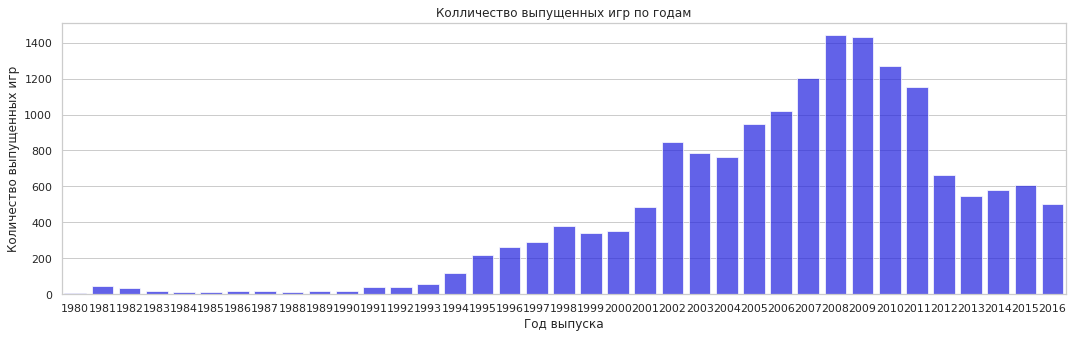

In [360]:
def draw_graph_countplot(value, name_x, name_y, title):
    plt.figure(figsize=(18, 5))
    sns.set_style('whitegrid')
    sns.countplot(value, color = 'blue',alpha = 0.7)
    plt.title(title)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    

title = "Колличество выпущенных игр по годам"
name_x = "Год выпуска"
name_y = "Количество выпущенных игр"
draw_graph_countplot(games.year_of_release, name_x, name_y, title)


Из графика видно, что распределение не является нормальным, рост количества игр начался в начале 90-x.
В 2008 году начался спад продаж консольных игр,на него повлиял финансовый кризис 2007-2008 и развитие мобильных игр.
Пик  продаж приходится на 2005-2011 год.  

2. Узнать, как менялись продажи по платформам.


Text(0.5, 1.0, 'Продажи по платформам за весь период')

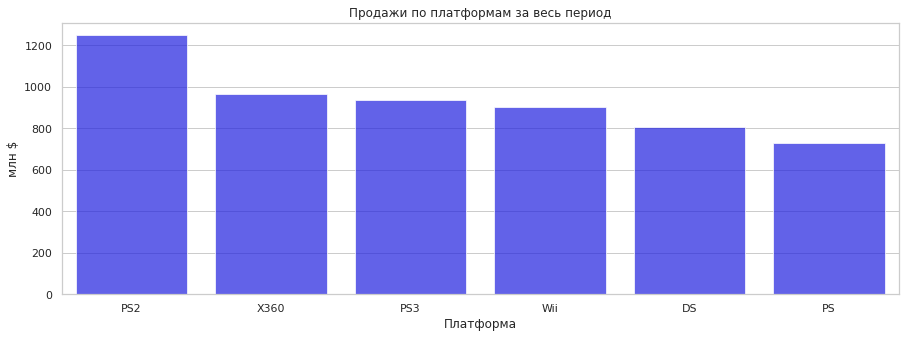

In [361]:
plt.figure(figsize=(15, 5))
sns.barplot(x=platform_on_sales.platform, y=platform_on_sales.total_sales, color = 'blue', alpha = 0.7)
plt.xlabel("Платформа")
plt.ylabel("млн $")
plt.title("Продажи по платформам за весь период")

3. Выбрать платформы с наибольшими суммарными продажами 


In [362]:
# Создадим таблицу платформ, на которой были самые высокие продажи:
platform_on_sales = games.pivot_table(index='platform', values='total_sales', aggfunc = 'sum')\
                        .sort_values(by='total_sales', ascending=False).reset_index()[:6]
platform_on_sales

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58


Из таблицы видно, что лидеры продаж принадлежат компании Microsoft и Sony

4. Построить распределение по годам

In [363]:
#таблица распределения продаж по годам и платформе 
platform_on_years = pd.DataFrame(games.groupby(['platform','year_of_release'])['total_sales'].sum())
platform_on_years
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
platforms_top = platform_on_years.query('platform in @platform_list').reset_index()
platforms_top
        

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,147.23
...,...,...,...
63,X360,2012,100.72
64,X360,2013,88.58
65,X360,2014,34.74
66,X360,2015,11.96


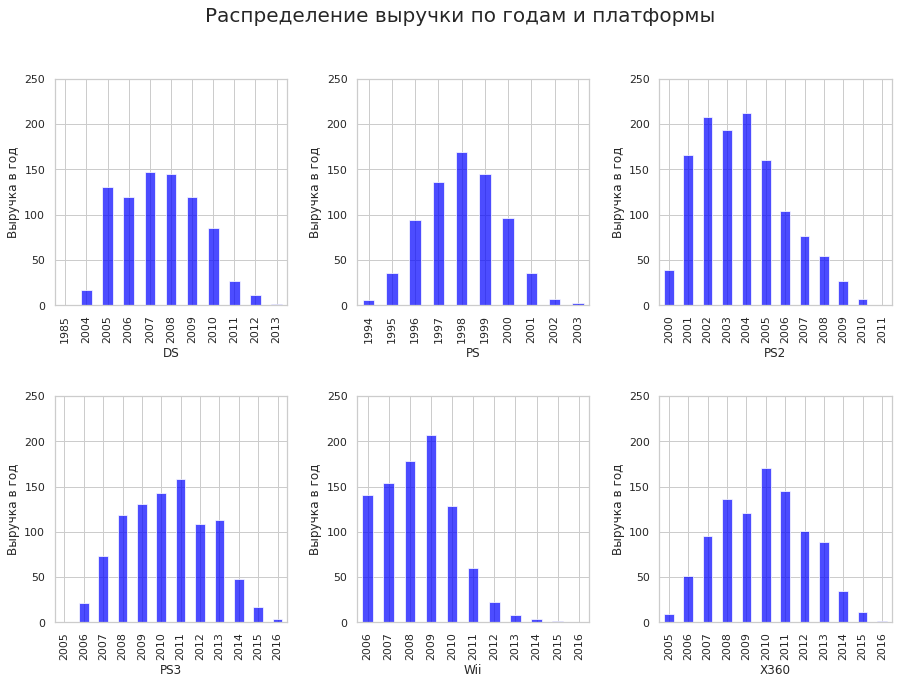

In [364]:
plt.figure(figsize = (15, 10)).suptitle('Распределение выручки по годам и платформы', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def draw_graph(i, plat):
    plt.subplot(2, 3, i)
    platforms_top.query('platform == @plat')\
                 .groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', color='blue', alpha = 0.7)
    plt.xlabel(plat)
    plt.ylabel('Выручка в год')
    plt.ylim(0, 250)

def create_graphs():
    i = 1
    for word in platforms_top['platform'].unique():
        draw_graph(i, word)
        i += 1
        
create_graphs()

Выясним сколько в среднем живут платформы

In [365]:
time_platforms = platforms_top.groupby('platform').agg({'year_of_release' : 'max'}) -  platforms_top.groupby('platform').agg({'year_of_release' : 'min'}) 
time_platforms

,year_of_release
platform,
DS,28
PS,9
PS2,11
PS3,11
Wii,10
X360,11


Из таблицы видно, что платформы в среднем живут 10 лет.

**Определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.**

# АНАЛИЗ ДАННЫХ ЗА 2013-2016 годы

In [366]:
period = (2013, 2016)
period_df = games.query('@period[0] <= year_of_release <= @period[1]').reset_index()
period_df = period_df.drop('index', 1)
period_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10.0,-10.0,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
2233,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
2234,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
2235,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01


In [367]:
# доход на платформе за актульный период
period_df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False).reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,40.06
7,PSV,32.99
8,Wii,13.66
9,PSP,3.74


In [368]:
#таблица распределения продаж по годам и платформе 
platform_on_years = period_df.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
platform_on_years['year_of_release'] = platform_on_years.index.get_level_values('year_of_release') 
platform_on_years 

total_sales year_of_release
platform year_of_release                             
3DS      2013                   56.57            2013
         2014                   43.76            2014
         2015                   27.78            2015
         2016                   15.14            2016
DS       2013                    1.54            2013
PC       2013                   12.66            2013
         2014                   13.63            2014
         2015                    8.52            2015
         2016                    5.25            2016
PS3      2013                  113.25            2013
         2014                   47.76            2014
         2015                   16.82            2015
         2016                    3.60            2016
PS4      2013                   25.99            2013
         2014                  100.00            2014
         2015                  118.90            2015
         2016                   69.25            2016
PSP      2013                    3.38            2013
         2014                    0.24            2014
         2015                    0.12            2015
PSV      2013                   10.59            2013
         2014                   11.90            2014
         2015                    6.25            2015
         2016                    4.25            2016
Wii      2013                    8.59            2013
         2014                    3.75            2014
         2015                    1.14            2015
         2016                    0.18            2016
WiiU     2013                   21.65            2013
         2014                   22.03            2014
         2015                   16.35            2015
         2016                    4.60            2016
X360     2013                   88.58            2013
         2014                   34.74            2014
         2015                   11.96            2015
         2016                    1.52            2016
XOne     2013                   18.96            2013
         2014                   54.07            2014
         2015                   60.14            2015
         2016                   26.15            2016

Продажи растут у PS4, XOne, 3DS, WiiU и PSV

# Задание

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Сформулируйте выводы и соотнесите их с продажами игр на других платформах.

In [369]:
period_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10.0,-10.0,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
2233,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
2234,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01
2235,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,NaN,0.01


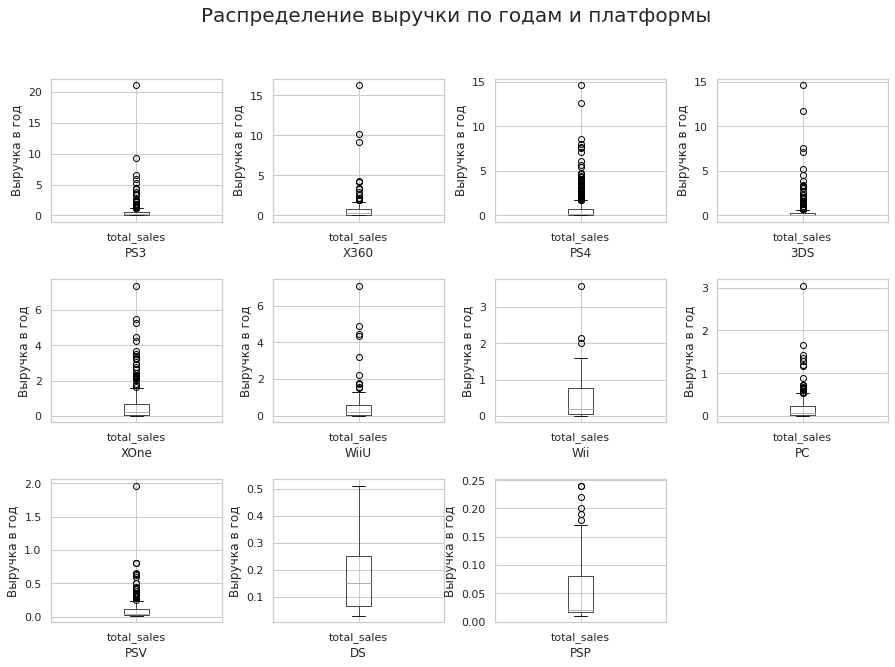

In [370]:
plt.figure(figsize = (15, 10)).suptitle('Распределение выручки по годам и платформы', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def t1(i, plat):
    plt.subplot(3, 4, i)
    plt.xlabel(plat)
    plt.ylabel('Выручка в год')
    period_df.query('platform == @plat').boxplot(column = 'total_sales')
    

def t2():
    i = 1
    for word in period_df['platform'].unique():
        t1(i, word)
        i += 1
        
t2()

In [371]:
for word in period_df['platform'].unique():
    p = period_df.query('platform == @word')
    print('Платформа', word)
    print(p['total_sales'].describe())
    print(' ')


Платформа PS3
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64
 
Платформа X360
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64
 
Платформа PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64
 
Платформа 3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64
 
Платформа XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max 

# Вывод

- средняя выручка в мире на одну игру составляет 488 тыс.дол. Максимальная выручка 21 млн.дол. 75% игр получили доход до 400 тысяч
- средняя выручка PS4 на одну игру составляет 801 тыс.дол. Максимальная выручка 14.6 млн.дол. 75% игр получили доход до 730 тысяч
- средняя выручка PS3 на одну игру составляет 526 тыс.дол. Максимальная выручка 21 млн.дол. 75% игр получили доход до 510 тысяч
- средняя выручка XOne на одну игру составляет 645 тыс.дол. Максимальная выручка 7.4 млн.дол. 75% игр получили доход до 685 тысяч
- средняя выручка X360 на одну игру составляет 735.5 тыс.дол. Максимальная выручка 16.2 млн.дол. 75% игр получили доход до 795 тысяч
- средняя выручка 3DS на одну игру составляет 472 тыс.дол. Максимальная выручка 14.6 млн.дол. 75% игр получили доход до 280 тысяч


# Задание

- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Сформулируйте выводы и соотнесите их с продажами игр на других платформах.

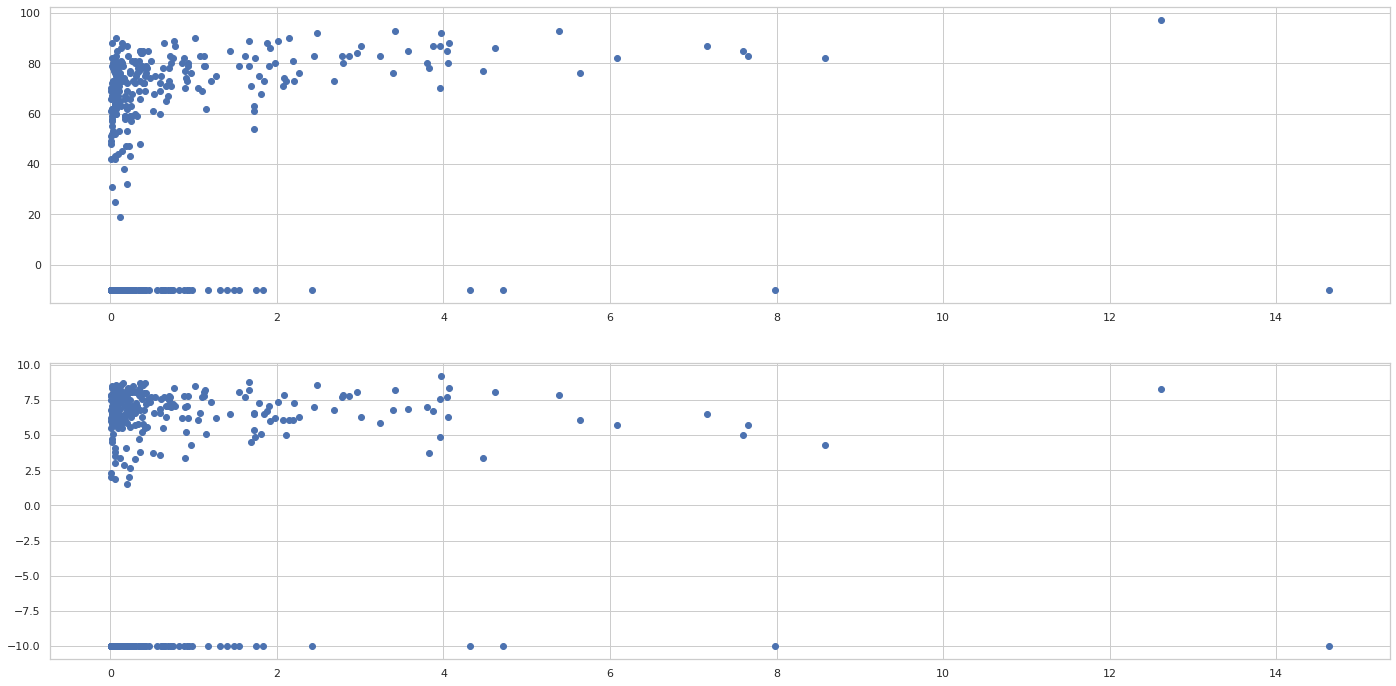

In [372]:
# PS4 
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (24,12))
scatter_ax.scatter(y= 'critic_score', x = 'total_sales',data = period_df.query('platform == "PS4"'))
scatter_ax2.scatter(y= 'user_score', x = 'total_sales',data = period_df.query('platform == "PS4"'))

In [402]:
PS4_ratings = period_df.query('platform == "PS4"').loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_ratings.head()

,total_sales,critic_score,user_score
2,14.63,-10.0,-10.0
4,12.62,97.0,8.3
9,8.58,82.0,4.3
10,7.98,-10.0,-10.0
11,7.66,83.0,5.7


In [404]:
PS4_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.218256,0.124905
critic_score,0.218256,1.000000,0.921378
user_score,0.124905,0.921378,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd19133af98>,
      dtype=object)

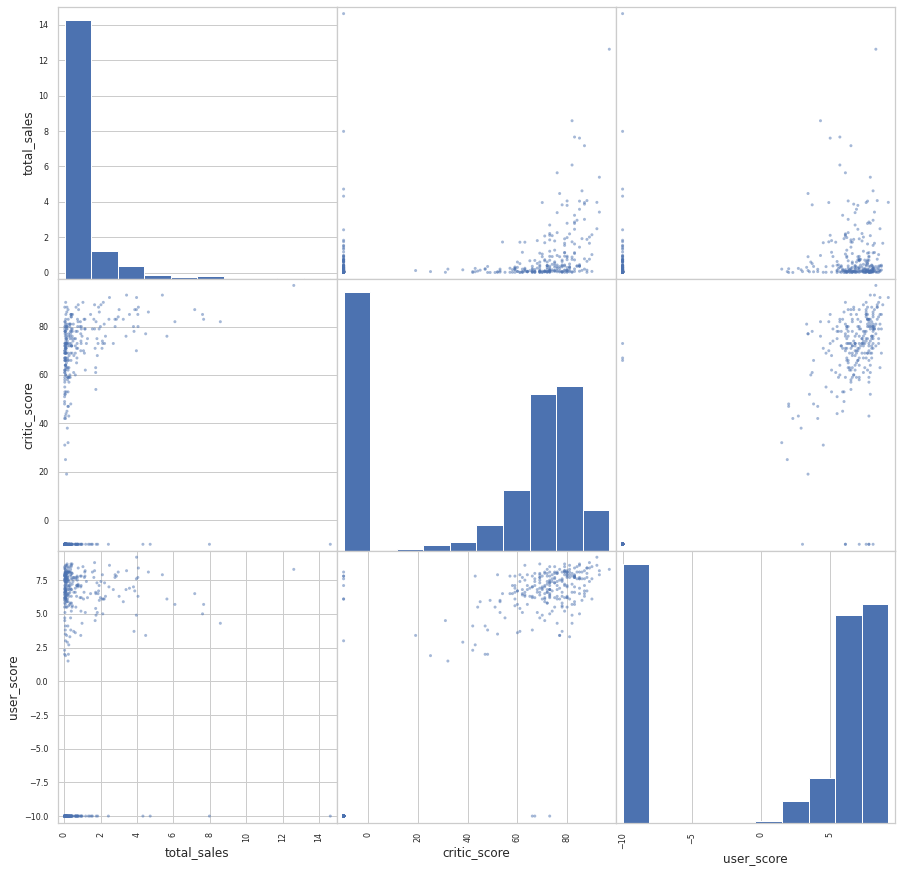

In [405]:
pd.plotting.scatter_matrix(PS4_ratings, figsize=(15, 15))

Вывод: Для платформы PS4 имеется прямая корреляция между отзывом критиков и продажами

# Задание

- Посмотрите на общее распределение игр по жанрам.
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

In [374]:
genre_table = pd.pivot_table(period_df, index='genre', values='total_sales', aggfunc='mean').reset_index()
genre_table.sort_values('total_sales', ascending=False)

,genre,total_sales
8,Shooter,1.245882
10,Sports,0.703972
4,Platform,0.576081
7,Role-Playing,0.499623
6,Racing,0.469294
2,Fighting,0.441375
0,Action,0.419376
3,Misc,0.404231
9,Simulation,0.350968
5,Puzzle,0.186471


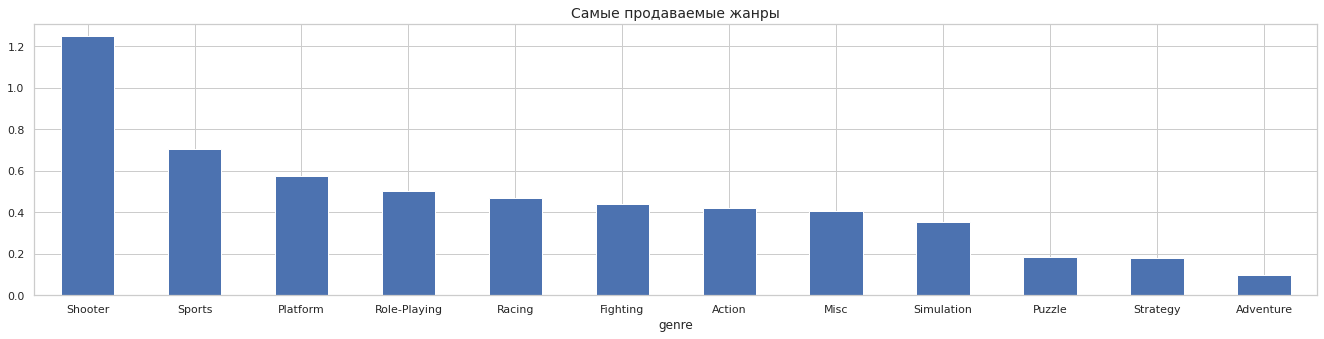

In [375]:
ax=genre_table.sort_values(by='total_sales', ascending=False).plot(x='genre', y='total_sales', kind='bar', figsize=(23, 5), rot=360)
ax.get_legend().remove()
plt.title('Самые продаваемые жанры', size=14)
plt.show()

# Вывод:

Топ самых популярных игр: Action, Shooter, Sports - возможность быстро и не напрягаясь получить дозу дофамина.
Низкий рейтинг у Strategy и Puzzle

# Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [376]:
# топ популярных платформ
na_sales = period_df.query('na_sales > 0')
na_table = pd.pivot_table(na_sales, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na_table

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.19
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


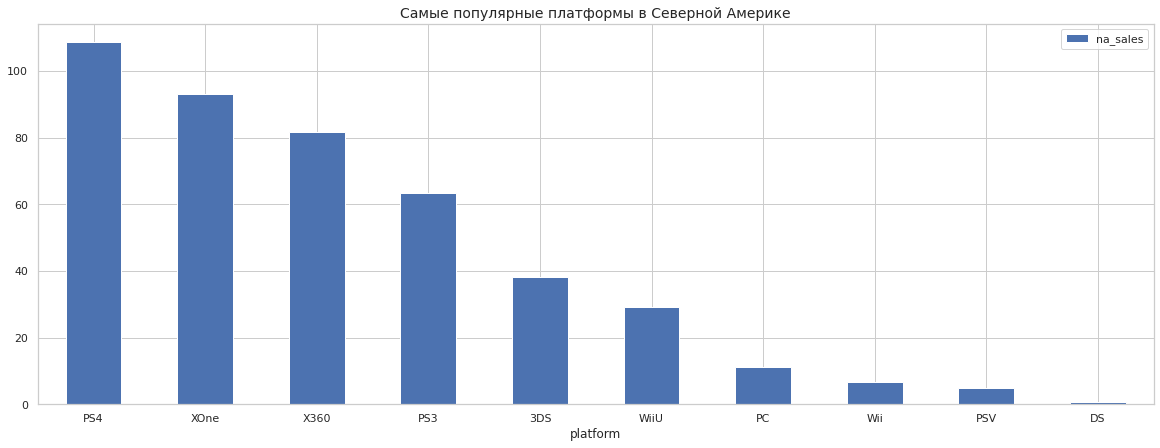

In [377]:
na_table.plot(x='platform', y='na_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Самые популярные платформы в Северной Америке', size=14)
plt.show()

In [378]:
eu_sales = period_df.query('eu_sales > 0')
eu_table = pd.pivot_table(eu_sales, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu_table

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,PC,25.84
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


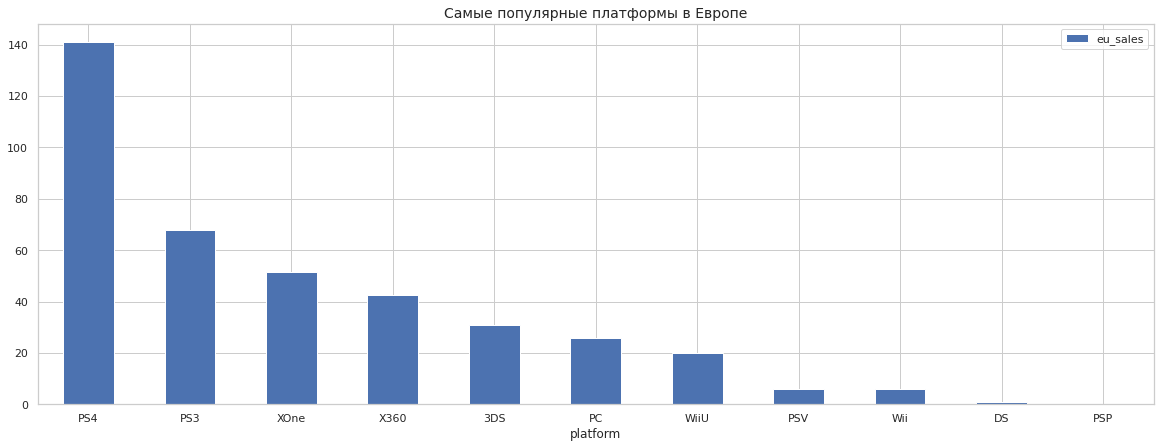

In [379]:
eu_table.plot(x='platform', y='eu_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Самые популярные платформы в Европе', size=14)
plt.show()

In [380]:
jp_sales = period_df.query('jp_sales > 0')
jp_table = pd.pivot_table(jp_sales, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp_table

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.53
6,X360,0.51
7,XOne,0.34
8,Wii,0.05


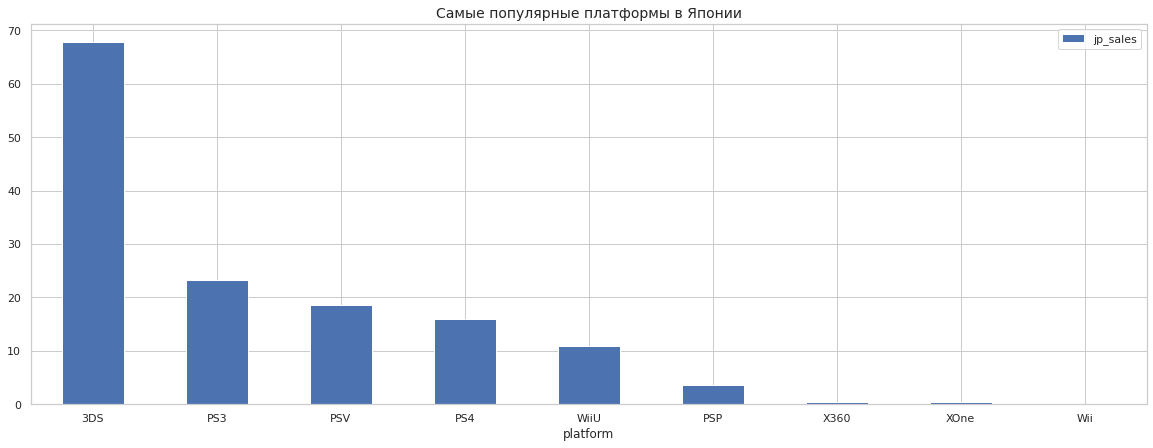

In [381]:
jp_table.plot(x='platform', y='jp_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Самые популярные платформы в Японии', size=14)
plt.show()

# Вывод по платформам

Рейтинг платформ Топ-5:
    - Северная Америка: 'PS4', 'XOne', 'X360', 'PS3', '3DS'
    - Европа: 'PS4', 'PS3', 'XOne', 'X360', '3DS'
    - Япония: '3DS', 'PS3', 'PSV', 'PS4', 'WiiU'
В Японии лидером является "Nintendo", платформа собственного производства
В Европе и Америке PlayStation

# Самые популярные жанры

In [382]:
# Топ популярных жанров
na_genre_table = pd.pivot_table(na_sales, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na_genre_table

,genre,na_sales
0,Action,126.13
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


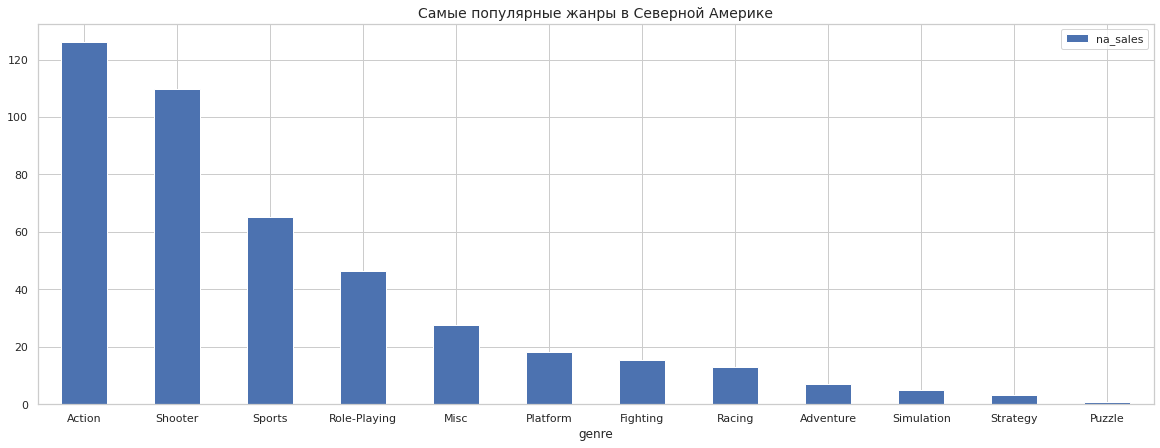

In [383]:
na_genre_table.plot(x='genre', y='na_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Самые популярные жанры в Северной Америке', size=14)
plt.show()

In [384]:
eu_genre_table = pd.pivot_table(eu_sales, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu_genre_table

,genre,eu_sales
0,Action,118.61
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


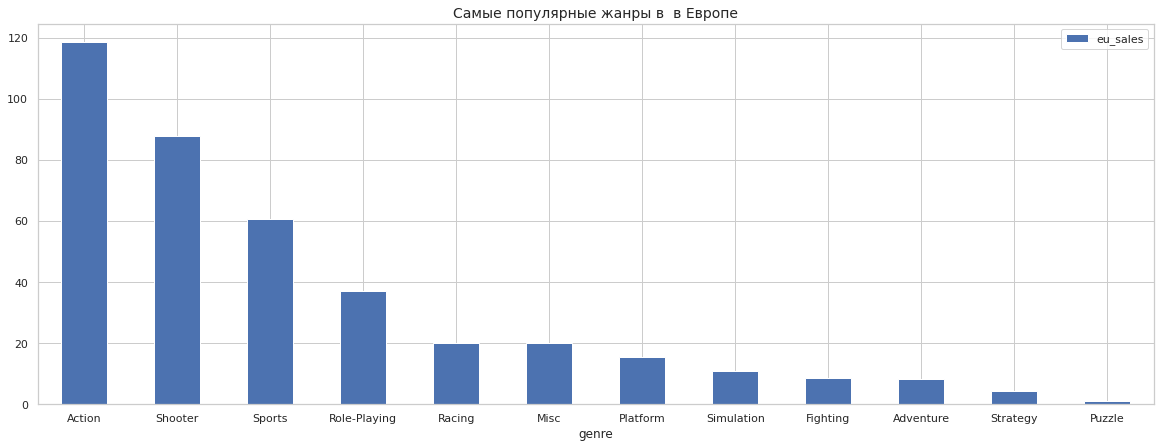

In [385]:
eu_genre_table.plot(x='genre', y='eu_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Самые популярные жанры в  в Европе', size=14)
plt.show()

In [386]:
jp_genre_table = pd.pivot_table(jp_sales, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp_genre_table

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.44
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


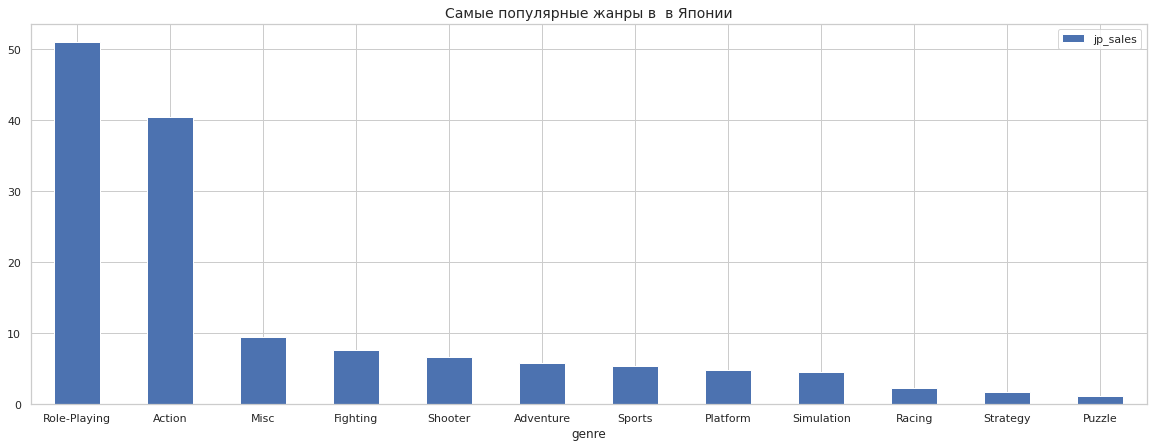

In [387]:
jp_genre_table.plot(x='genre', y='jp_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Самые популярные жанры в  в Японии', size=14)
plt.show()

# Вывод по жанрам

Рейтинг жанров Топ-5:

- Северная Америка: 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'
- Европа: 'Action', 'Shooter', 'Sports','Role-Playing', 'Racing'
- Япония: 'Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter'
Любимые жанры в Америке и Европе практически совпадают. В Японии с их любовью к ролевым играм на первом месте 'Role-Playing'

In [388]:
# Влияние рейтинга на регион
na_rating_table = pd.pivot_table(na_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na_rating_table

,rating,na_sales
0,M,165.29
1,E,79.05
2,E10+,54.24
3,T,49.79


Text(0.5, 0, 'продажи млн, $')

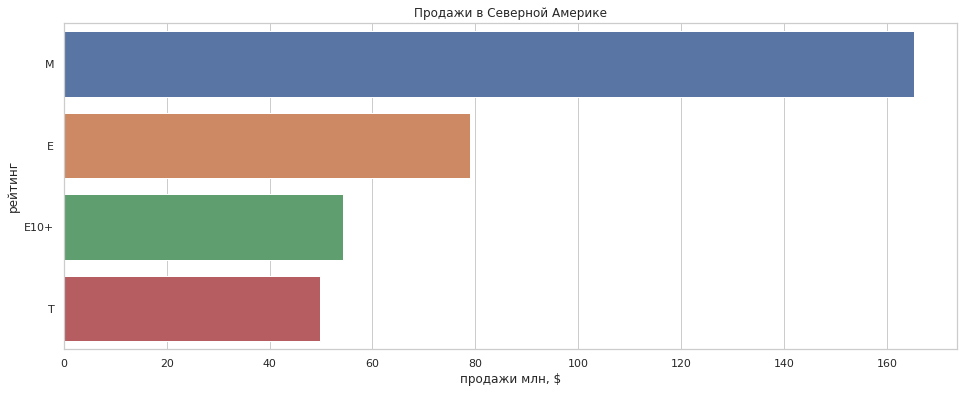

In [389]:
x = na_rating_table.rating
y = na_rating_table.na_sales

sns.barplot(x=y, y=x)
plt.title('Продажи в Северной Америке')
plt.ylabel("рейтинг")
plt.xlabel('продажи млн, $')

In [390]:
eu_rating_table = pd.pivot_table(eu_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu_rating_table

,rating,eu_sales
0,M,145.80
1,E,83.36
2,E10+,42.69
3,T,41.95


Text(0.5, 0, 'продажи млн, $')

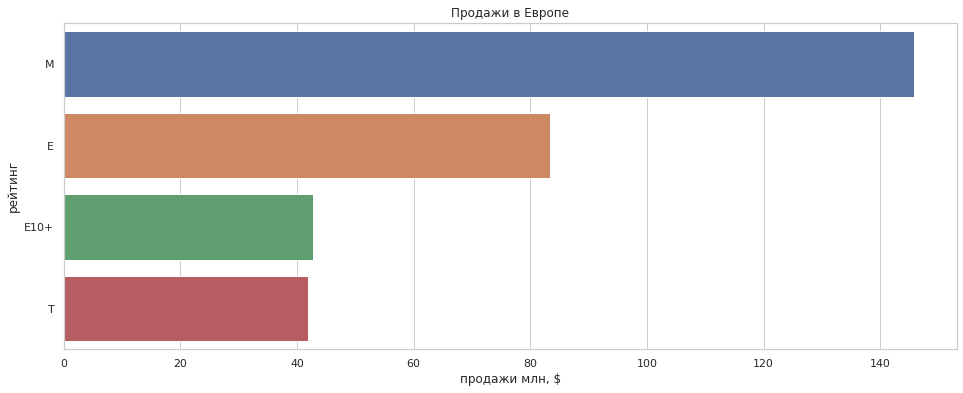

In [391]:
x = eu_rating_table.rating
y = eu_rating_table.eu_sales

sns.barplot(x=y, y=x)
plt.title('Продажи в Европе')
plt.ylabel("рейтинг")
plt.xlabel('продажи млн, $')

In [392]:
jp_rating_table = pd.pivot_table(jp_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp_rating_table

,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


Text(0.5, 0, 'продажи млн, $')

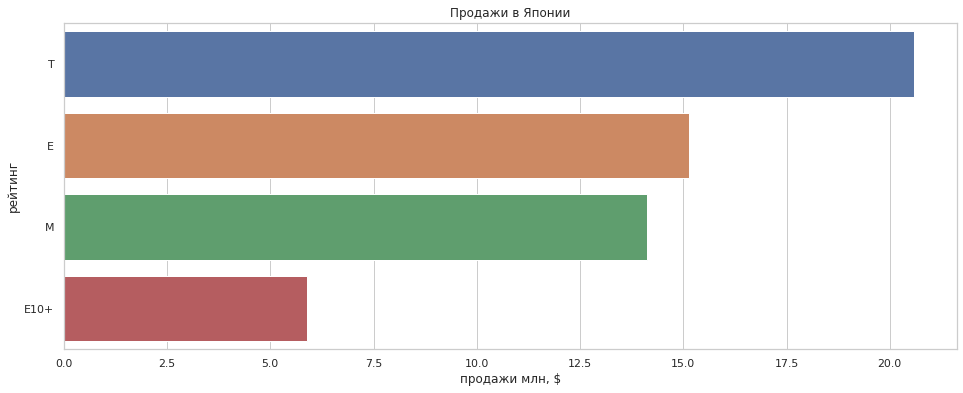

In [393]:
x = jp_rating_table.rating
y = jp_rating_table.jp_sales

sns.barplot(x=y, y=x)
plt.title('Продажи в Японии')
plt.ylabel("рейтинг")
plt.xlabel('продажи млн, $')

# Вывод по рейтингу

- В Японии лидируют игры для людей старше 13 лет. 
- В Европе и Америке игры для людей старше 17 лет


# Общий портрет пользователя игр
Американские и европейские игроки от 17 лет любят играть в 'Action'и 'Shooter' на платформе PS4
Японские игроки от 13 лет любят играть в 'Role-Playing' и 'Action'на платформе 3DS

# Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Задайте самостоятельно пороговое значение alpha

Достаточно детально проанализировали наши данные и изучили портреты пользователей.      
Давай теперь проверим наши гипотезы.    


# Средние пользовательские рейтинги платформ Xbox One и PC
   - H0 - cредние пользовательские рейтинги платформ X360 и PSP одинаковые
   - H1 - cредние пользовательские рейтинги платформ X360 и PSP разные


In [394]:
hypo=games[games['platform'].isin(['PSP', 'X360']) ].dropna()
hypo=hypo.query('user_score != -10')
# дисперсии
print( np.var(hypo.query('platform =="X360"')['user_score']))
print( np.var(hypo.query('platform =="PSP"')['user_score']))

2.0740789030470914
1.5018851168747638


так как разница дисперсии больше 5%, параметр equal_var = False

In [395]:
alpha = 0.01

results = st.ttest_ind(hypo.query('platform =="X360"')['user_score'], hypo.query('platform =="PSP"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги платформ X360 и PSP разные.")
else:
    print("Не получилось отвергнуть нулевую гипотезу так как cредние пользовательские рейтинги платформ X360 и PSP одинаковые")

p-значение: 1.2400966121511303e-12
Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги платформ X360 и PSP разные.


# Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»)
- H0 - cредние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 - cредние пользовательские рейтинги жанров Action и Sports разные

In [397]:
hypo=games[games['genre'].isin(['Sports', 'Action']) ]
# дисперсии
print( np.var(hypo.loc[hypo['genre']=='Action', 'user_score']))
print( np.var(hypo.loc[hypo['genre']=='Sports', 'user_score']))

73.25466560730253
72.85492796931923


так как разница дисперсии меньше 5%, параметр equal_var = True

In [398]:
alpha = 0.01

results = st.ttest_ind(hypo.query('genre =="Action"')['user_score'],
                       hypo.query('genre =="Sports"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не получилось отвергнуть нулевую гипотезу так как cредние пользовательские рейтинги жанров Action и Sports одинаковые")

p-значение: 1.4712828075340236e-08
Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги жанров Action и Sports разные.


# Общий вывод:
- Рынок игр находится в стадии спада.
- Если разрабатывать игры для Северной Америки и Европы нужно ориентироваться на возрастную категорию 17+ в жанре экшен на платформе PC4.
- Если разрабатывать игры для Японии нужно ориентироваться на возрастную категорию 13+ в жанре ролевых игр 3DS.